## Sparse Signal Reconstruction

### Objective:
- Explore signal reconstruction using sparse sampling, focusing on different reconstruction techniques.

### Process:
1. **Signal Creation**: Generate a composite signal from two sine waves.
2. **Frequency Domain Analysis**: Apply Discrete Cosine Transform (DCT) to analyze the signal in the frequency domain.
3. **Sampling**: Randomly sample a subset of the signal to simulate sparse data.
4. **Reconstruction Methods**: Use L2 norm minimization, least squares, and L1 norm minimization for signal reconstruction.
5. **Comparison and Visualization**: Compare these methods by visualizing the reconstructed signals against the original.

### Tools:
- Python libraries: NumPy, Matplotlib, SciPy, CVXPY.

### Key Learning:
- Understanding and implementing signal processing techniques for sparse data reconstruction.



1. **Setting Parameters**:
   - $ N = 1000 $: This defines the number of discrete points in our signal. In mathematical terms, $ N $ represents the dimension of our vector space where the signal resides.
   - $ t = \text{np.linspace}(0, 1/8, N) $: This creates a linearly spaced vector $ t $ of $ N $ points between 0 and $ \frac{1}{8} $. Mathematically, $ t $ represents the time domain over which the signal is defined, providing the temporal resolution of our signal.

2. **Signal Formation**:
   - $ f = \sin(1394 \pi t) + \sin(3266 \pi t) $: Here, $ f $ is a composite signal formed by the superposition of two sine waves. The terms $ 1394 \pi $ and $ 3266 \pi $ represent the angular frequencies of these sine waves. In the context of signal processing, this equation is a model for a time-domain signal with two dominant frequency components.

3. **Discrete Cosine Transform (DCT)**:
   - $ \text{xc} = \text{dct}(f, \text{norm}='ortho') $: The DCT transforms the signal $ f $ from the time domain to the frequency domain. The 'ortho' normalization ensures that the transform is orthonormal. Mathematically, the DCT expresses the signal $ f $ as a sum of cosine functions oscillating at different frequencies. This transformation is crucial for analyzing the frequency components in $ f $ and is used extensively in signal processing and data compression.
   **From Time to Frequency Domain**: The Discrete Cosine Transform (DCT) is a technique to convert a signal from its original time domain into a frequency domain. The mathematical expression for DCT is given by:
   $$ X[k] = \sum_{n=0}^{N-1} f[n] \cdot \cos\left[\frac{\pi}{N} \cdot k \cdot \left(n + \frac{1}{2}\right)\right] $$
   where $ X[k] $ represents the frequency domain representation, and $ f[n] $ is the time-domain signal.

   - **Orthonormality**: The 'ortho' normalization makes the DCT an orthonormal transformation, preserving the Euclidean norm (or energy) of the signal during the transformation process.

### Graphs
1. **First Graph - Time Domain Representation of the Signal**:
   - **Purpose**: This graph displays the composite signal $ f $ in the time domain.
2. **Second Graph - Frequency Domain Representation**:
   - **Purpose**: This graph shows the frequency domain representation of the signal after applying the DCT.




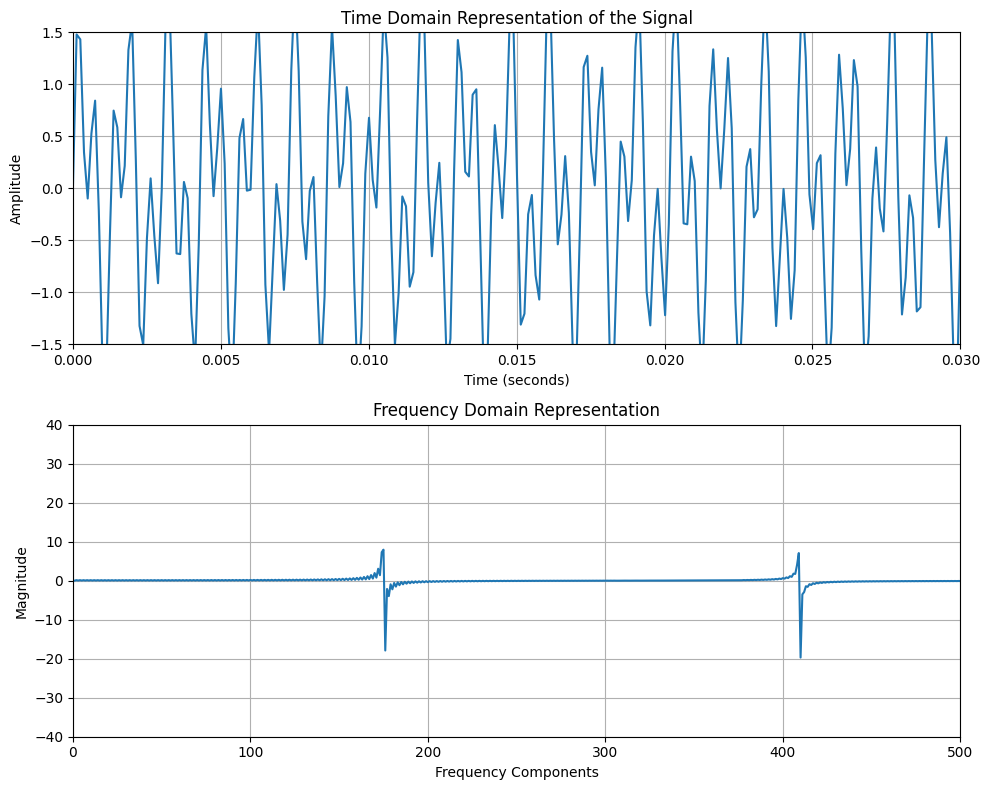

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
from numpy.linalg import pinv
import cvxpy as cp
import warnings # For Github share, hide local file paths
warnings.filterwarnings('ignore')

# Parameters
N = 1000
t = np.linspace(0, 1/8, N)
f = np.sin(1394 * np.pi * t) + np.sin(3266 * np.pi * t)

# Discrete Cosine Transform
xc = dct(f, norm='ortho')

# Plotting
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(t, f)
plt.title('Time Domain Representation of the Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.axis([0, 0.03, -1.5, 1.5])


plt.subplot(2, 1, 2)
w = np.linspace(1, N, N)
plt.plot(w, xc)
plt.title('Frequency Domain Representation')
plt.xlabel('Frequency Components')
plt.ylabel('Magnitude')
plt.grid(True)
plt.axis([0, 500, -40, 40])

plt.tight_layout()
plt.show()


### What we observe from the graphs?


1. **Sparsity**: A signal is considered sparse if most of its components are zero or near-zero, meaning it can be effectively represented with a small number of non-zero components. Sparsity can be in the time domain or the frequency domain.

2. **Signal Characteristics**: For many natural and man-made signals (like audio, images, etc.), while the time-domain representation may not be sparse (as seen in the first graph), their frequency-domain representation (second graph) often is. This means that such signals can be effectively represented by a relatively small number of frequency components.

3. **Role of DCT**: The DCT helps in transforming the signal from the time domain to the frequency domain. If the original signal has a structure that is compressible or sparse in the frequency domain (like being composed of a few sine waves), the DCT will make this sparsity apparent. It does this by concentrating the signal's energy into a few significant frequency components.

4. **Importance in Data Compression**: This property of DCT is why it's widely used in data compression techniques (like JPEG for images). By transforming a signal to the frequency domain where it is sparse, one can keep the most significant frequencies (where the signal has non-negligible components) and discard or compress the rest, achieving effective compression with minimal loss of information.

5. **In This Project Code**: In our specific case, the signal `f` is composed of two sine waves. When we apply the DCT to this signal, we see that most of the energy of the signal is concentrated in a few DCT coefficients corresponding to the frequencies of these sine waves, demonstrating the sparsity in the frequency domain.

In summary, the DCT can make the sparsity of a signal more evident by transforming it to a domain where its essential components are concentrated in a few significant values. This is a key concept in fields like signal processing and data compression.

## Signal Reconstruction

Certainly! Let's break down this part of your code concisely, focusing on the mathematical and conceptual aspects:

1. **Sampling**:
   - **Objective**: To simulate a scenario where we only have access to a subset of the entire signal data.
   - **Process**: 
     - `m = 300` sets the number of samples to 300, much less than the total number of data points (N = 1000).
     - `perm = np.random.permutation(N)` creates a random permutation of indices from 0 to N-1.
     - `A = dct(np.identity(N), norm='ortho')[perm[:m], :]` generates a matrix `A` that represents the sampling process in the frequency domain. It's essentially selecting `m` rows from the DCT matrix, corresponding to the randomly chosen sample points.
     - `y = f[perm[:m]]` is the sampled signal, containing the values of `f` at the `m` randomly chosen points.

2. **Inverse Problems (Signal Reconstruction)**:
   - **Objective**: To reconstruct the original signal from the sparse samples.
   - **Methods**:
     - **Pseudo-Inverse (`x2`)**: `x2 = pinv(A) @ y` uses the pseudo-inverse of `A` to find an approximate solution. This method minimizes the L2 norm (Euclidean norm) of the error between the observed samples and the samples of the reconstructed signal.
     - **Least Squares (`xm`)**: `xm = np.linalg.lstsq(A, y, rcond=None)[0]` applies the least squares method to find a solution that minimizes the sum of the squares of the residuals.

3. **L1 Norm Minimization using CVXPY**:
   - **Objective**: To find a sparse solution by minimizing the L1 norm, which promotes sparsity.
   - **Process**:
     - `x1 = cp.Variable(N)` creates an optimization variable of length N.
     - `objective = cp.Minimize(cp.norm(x1, 1))` sets the objective to minimize the L1 norm of `x1`.
     - `constraints = [A @ x1 == y]` defines the constraint that the DCT of `x1` should match the sampled data `y`.
     - `prob = cp.Problem(objective, constraints)` formulates the optimization problem.
     - `prob.solve()` solves the optimization problem.

### Note on Methods:


#### Pseudo-Inverse Minimization

1. **Mathematical Formulation**:
   - The pseudo-inverse solution aims to solve the system $ A \mathbf{x} = \mathbf{y} $ where $ A $ is not a square matrix or is singular. The pseudo-inverse of $ A $, denoted as $ A^+ $, provides a solution that minimizes the L2 norm of the error.
   - The solution using pseudo-inverse is given by:
     $$ \mathbf{x_2} = A^+ \mathbf{y} $$
   - Mathematically, this is equivalent to minimizing the L2 norm of the difference between the actual and predicted values, i.e.,
     $$ \min_{\mathbf{x}} \|\mathbf{y} - A\mathbf{x}\|_2 $$
   - The pseudo-inverse $ A^+ $ is typically computed using Singular Value Decomposition (SVD).

#### L1 Norm Minimization

1. **Mathematical Formulation**:
   - L1 norm minimization is used to find a solution that is sparse (i.e., has many zero or near-zero entries).
   - The L1 norm of a vector $ \mathbf{x} $ is the sum of the absolute values of its components:
     $$ \| \mathbf{x} \|_1 = \sum_i |x_i| $$
   - The L1 norm minimization problem is formulated as:
     $$ \min_{\mathbf{x}} \|\mathbf{x}\|_1 $$
     Subject to $ A\mathbf{x} = \mathbf{y} $.
   - This formulation promotes sparsity in the solution $ \mathbf{x} $ because the L1 norm is less sensitive to small values, encouraging many components of $ \mathbf{x} $ to be zero or close to zero.

**Key Differences**:
- The pseudo-inverse method focuses on minimizing the overall error (L2 norm) without concern for the sparsity of the solution.
- L1 norm minimization, on the other hand, aims to find the sparsest solution that satisfies the equation $ A\mathbf{x} = \mathbf{y} $. This is particularly useful in compressive sensing and sparse signal recovery where the signal is known to have a sparse representation.




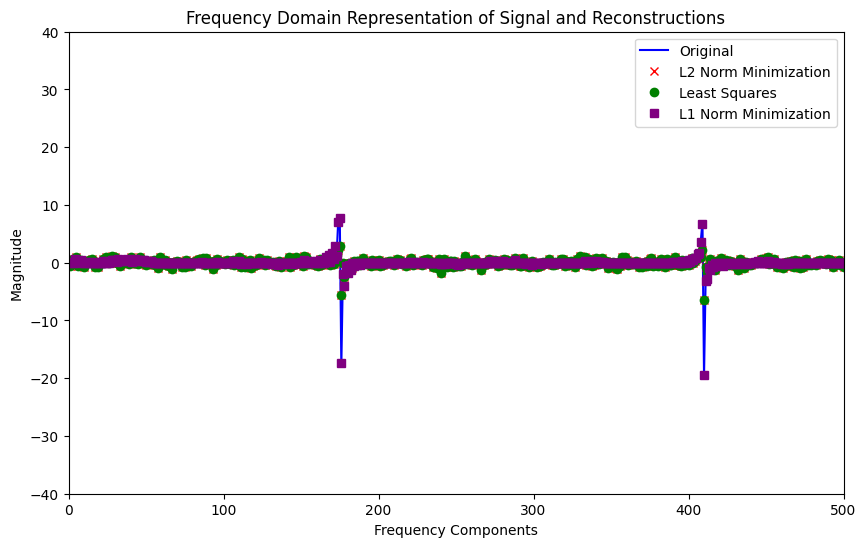

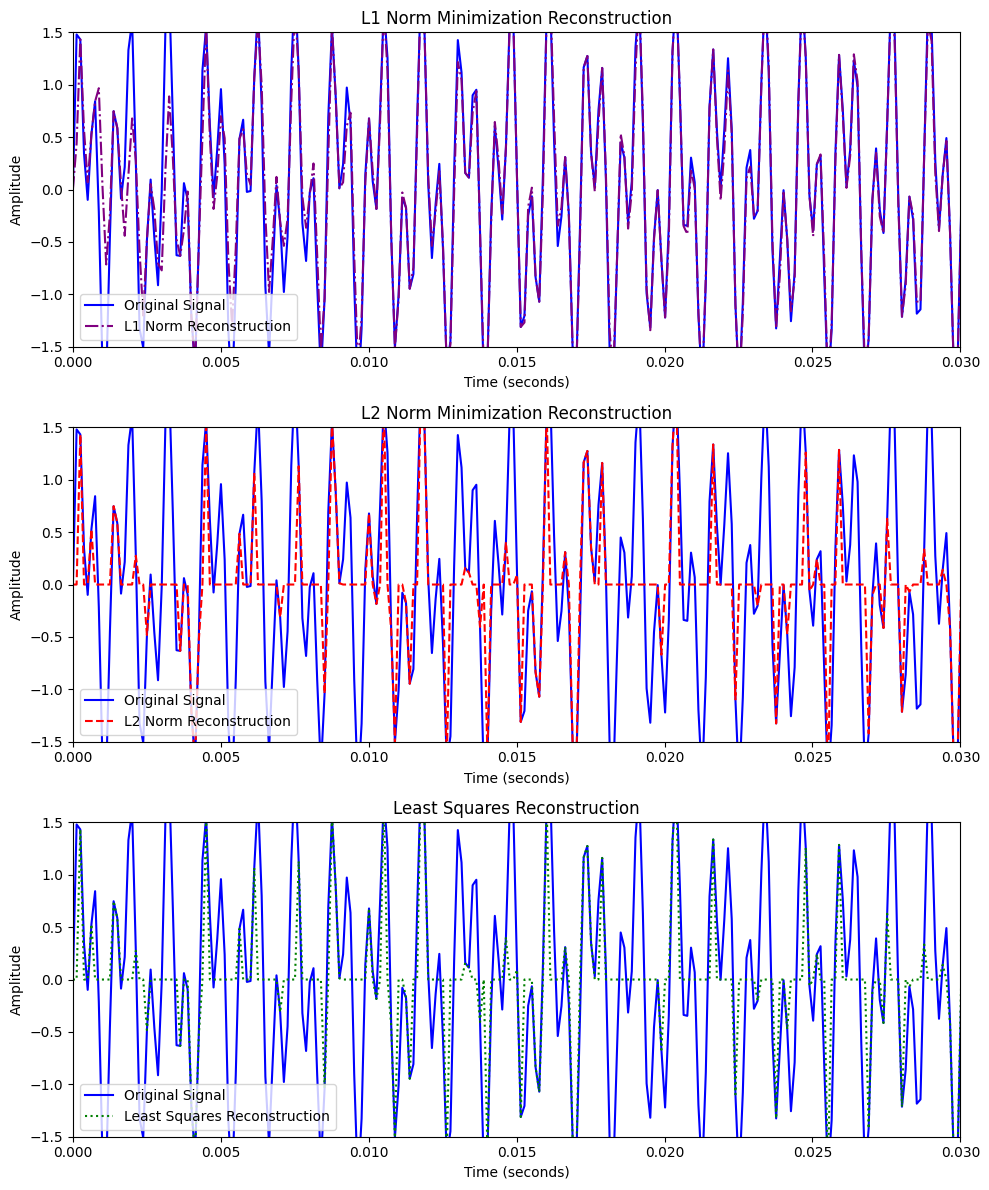

In [8]:

# Sampling
m = 300
perm = np.random.permutation(N)
A = dct(np.identity(N), norm='ortho')[perm[:m], :]
y = f[perm[:m]]

# Inverse problems
x2 = pinv(A) @ y
xm = np.linalg.lstsq(A, y, rcond=None)[0]

# L1 approximation using CVXPY
x1 = cp.Variable(N)
objective = cp.Minimize(cp.norm(x1, 1))
constraints = [A @ x1 == y]
prob = cp.Problem(objective, constraints)
prob.solve()

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(w, xc, label='Original', color='blue')
plt.plot(w, x2, 'x', label='L2 Norm Minimization', color='red')
plt.plot(w, xm, 'o', label='Least Squares', color='green')
plt.plot(w, x1.value, 's', label='L1 Norm Minimization', color='purple')
plt.title('Frequency Domain Representation of Signal and Reconstructions')
plt.xlabel('Frequency Components')
plt.ylabel('Magnitude')
plt.legend()
plt.axis([0, 500, -40, 40])
plt.show()


# Reconstruction
f2 = idct(x2, norm='ortho')
fm = idct(xm, norm='ortho')
f1 = idct(x1.value, norm='ortho')

# Plotting reconstructed signals
plt.figure(figsize=(10, 12))

plt.subplot(3, 1, 1)
plt.plot(t, f, label='Original Signal', color='blue')
plt.plot(t, f1, '-.', label='L1 Norm Reconstruction', color='purple')
plt.title('L1 Norm Minimization Reconstruction')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.axis([0, 0.03, -1.5, 1.5])
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, f, label='Original Signal', color='blue')
plt.plot(t, f2, '--', label='L2 Norm Reconstruction', color='red')
plt.title('L2 Norm Minimization Reconstruction')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.axis([0, 0.03, -1.5, 1.5])
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, f, label='Original Signal', color='blue')
plt.plot(t, fm, ':', label='Least Squares Reconstruction', color='green')
plt.title('Least Squares Reconstruction')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.axis([0, 0.03, -1.5, 1.5])
plt.legend()

plt.tight_layout()
plt.show()



## Results

In the graphs, L1 norm minimization outperforms others, achieving the closest approximation to the original signal, both in frequency and time domains.

### Note on Using Convex Optimization with Python:

In our code we have used convex optimization to solve L1 Norm minimization, the steps are explained below:

1. **Variable Declaration**:
   - `x1 = cp.Variable(N)`: 
     - This line creates an optimization variable `x1` with `N` elements. In the context of your problem, `x1` represents the signal to be reconstructed.
     - `cp.Variable` is a CVXPY function that declares a variable for optimization.

2. **Objective Function**:
   - `objective = cp.Minimize(cp.norm(x1, 1))`: 
     - Here, an objective function is defined for the optimization problem. The goal is to minimize the L1 norm of the variable `x1`.
     - `cp.norm(x1, 1)` calculates the L1 norm of `x1`, which is the sum of the absolute values of its components.
     - `cp.Minimize` is a CVXPY function that specifies that the optimization problem aims to minimize the given expression, in this case, the L1 norm of `x1`.

3. **Constraints**:
   - `constraints = [A @ x1 == y]`: 
     - This line specifies the constraints of the optimization problem. The constraint here is a linear equation involving the variable `x1`.
     - `A @ x1` performs matrix multiplication between `A` (the transformation matrix representing the sampling process) and `x1`. This product should equal `y`, the sampled data.
     - The constraint ensures that the reconstructed signal, when transformed similarly to the original signal, matches the sampled data.

4. **Problem Formulation**:
   - `prob = cp.Problem(objective, constraints)`: 
     - This line constructs the optimization problem with the specified objective and constraints.
     - `cp.Problem` is a CVXPY function used to define an optimization problem. It takes the objective function and a list of constraints as arguments.

5. **Solving the Problem**:
   - `prob.solve()`: 
     - This line instructs CVXPY to solve the optimization problem.
     - During this process, CVXPY employs underlying solvers to find the values of `x1` that minimize the L1 norm while satisfying the constraint `A @ x1 == y`.
     - The result is a solution that is typically sparse, making it well-suited for scenarios where the underlying signal is expected to have a sparse representation.